In [210]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,precision_score, recall_score, f1_score

In [212]:
df=pd.read_csv("Churn_Modelling.csv")
df.head(4)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [216]:
df=df.drop(columns=["RowNumber","CustomerId","Surname"])
df.head(4)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0


In [218]:
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)
df.head(4)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False


In [220]:
X = df.drop("Exited", axis=1)
y = df["Exited"]


In [222]:
numeric_features = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

In [224]:
scaler = MinMaxScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

In [226]:
X.head(4)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.538,0.324324,0.2,0.000000,0.000000,1,1,0.506735,False,False,False
1,0.516,0.310811,0.1,0.334031,0.000000,0,1,0.562709,False,True,False
2,0.304,0.324324,0.8,0.636357,0.666667,1,0,0.569654,False,False,False
3,0.698,0.283784,0.1,0.000000,0.333333,0,0,0.469120,False,False,False


In [228]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=23)

In [230]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9391,0.992,0.581081,0.0,0.000000,0.333333,1,1,0.481000,False,True,True
2730,0.640,0.162162,0.3,0.531875,0.000000,0,0,0.015718,False,True,True
1189,0.702,0.297297,0.5,0.676540,0.000000,1,1,0.767703,False,False,True
7066,0.758,0.324324,0.1,0.000000,0.333333,1,1,0.747693,False,True,False
8194,0.564,0.324324,0.4,0.502657,0.000000,1,0,0.504983,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
347,0.586,0.554054,0.3,0.678887,0.000000,1,1,0.160816,True,False,True
6175,0.306,0.175676,0.4,0.000000,0.333333,1,1,0.108178,False,True,True
9704,0.550,0.054054,0.9,0.000000,0.333333,1,0,0.785382,False,False,True
9256,0.830,0.256757,0.7,0.409364,0.000000,1,0,0.045385,True,False,True


In [232]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [234]:
model.score(X_test,y_test)

0.8116666666666666

In [236]:
y_pred = model.predict(X_test)

In [255]:
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

Accuracy:  0.8116666666666666
Precision:  0.6157894736842106
Recall:  0.1921182266009852
F1 Score:  0.2928660826032541
[[2318   73]
 [ 492  117]]


In [257]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

True Negatives (TN): 2318
False Positives (FP): 73
False Negatives (FN): 492
True Positives (TP): 117


In [245]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8117


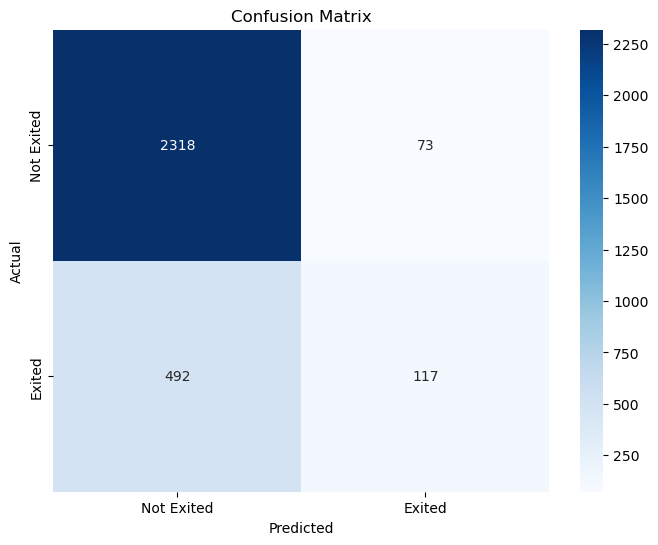

In [253]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Exited', 'Exited'],
            yticklabels=['Not Exited', 'Exited'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


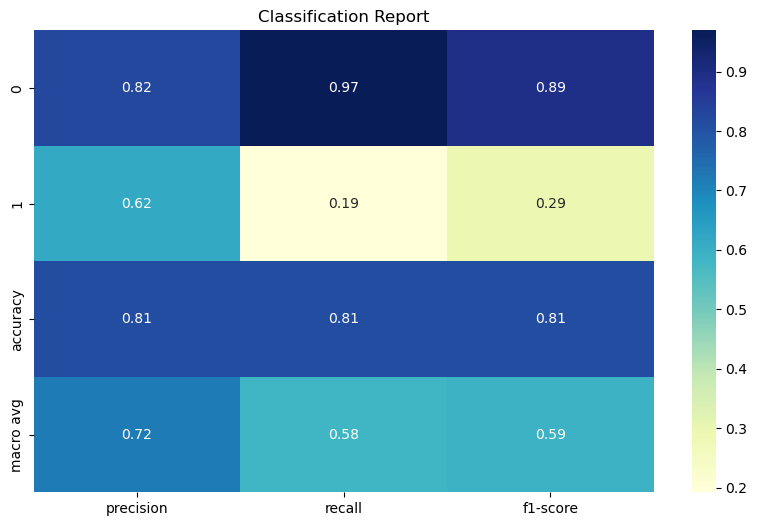

In [167]:
class_report = classification_report(y_test, y_pred, output_dict=True)  
report_df = pd.DataFrame(class_report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Classification Report')
plt.show()

In [169]:
metrics = report_df[['precision', 'recall', 'f1-score']].iloc[:-1]  # 'accuracy' hariç
print(metrics)

           precision    recall  f1-score
0           0.824911  0.969469  0.891367
1           0.615789  0.192118  0.292866
accuracy    0.811667  0.811667  0.811667
macro avg   0.720350  0.580794  0.592117


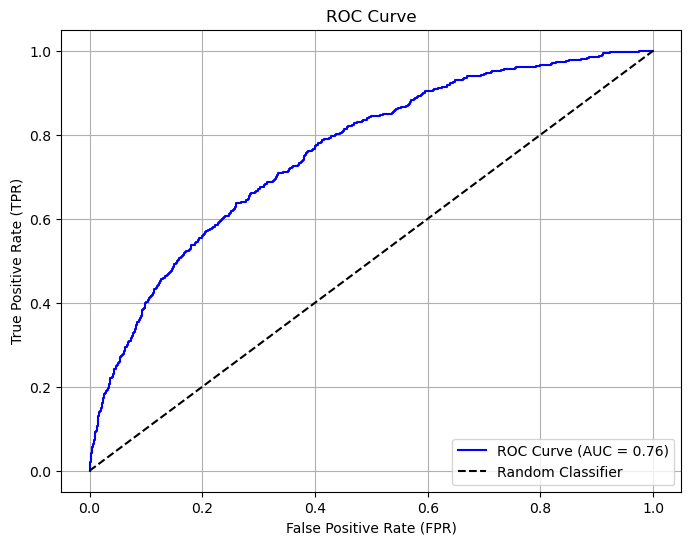

In [171]:
from sklearn.metrics import roc_curve, roc_auc_score

# Modelin olasılık tahminlerini al
y_prob = model.predict_proba(X_test)[:, 1]

# ROC eğrisi metriklerini hesapla
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

# ROC Eğrisi çiz
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')  # Rastgele sınıflandırıcı
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc="lower right")
plt.grid()
plt.show()

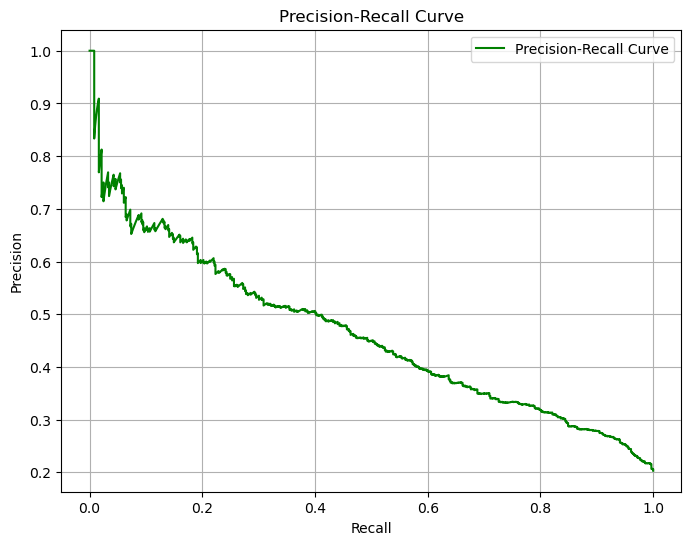

In [173]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='green', label='Precision-Recall Curve')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="best")
plt.grid()
plt.show()

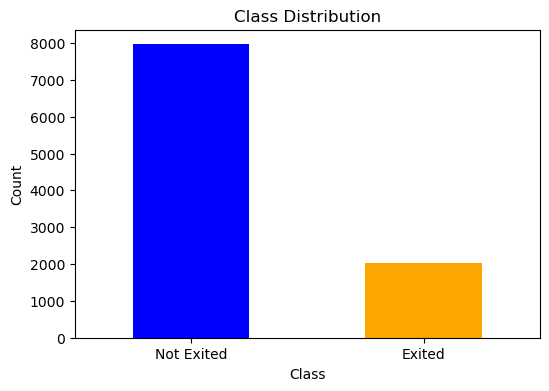

In [175]:
y.value_counts().plot(kind='bar', color=['blue', 'orange'], figsize=(6, 4))
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Exited', 'Exited'], rotation=0)
plt.show()

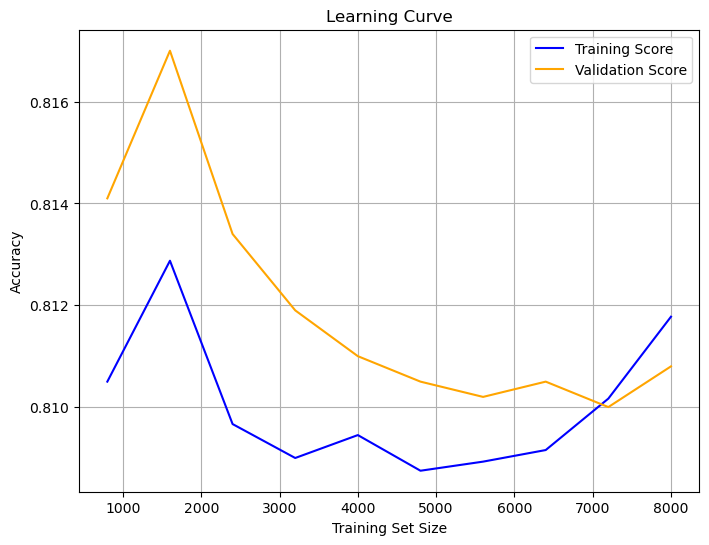

In [177]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='orange')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()
